In [ ]:
import pandas as pd
import seaborn
df = pd.read_csv("/content/Auto.csv")
print(df.head())
print(df.shape)
print(df.loc[:,["mpg","weight","year"]].describe())
#MPG: Average 23.446, Range of 37
#WEIGHT: Average 2977.584, Range of 3527
#YEAR: Average 76.010, Range of 12

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
(392, 9)
              mpg       weight        year
count  392.000000   392.000000  390.000000
mean    23.445918  2977.584184   76.010256
std      7.805007   849.402560    3.668093
min      9.000000  1613.000000   70.000000
25%     17.000000  2225.250000   73.000000
50%     22.750000  2803.500000   76.000000

In [ ]:
print(df.dtypes)
df["cylinders"] = df["cylinders"].astype("category")
print("\n\n",df["cylinders"].cat.codes)
df["origin"] = df["origin"].astype("category")
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object


 0      4
1      4
2      4
3      4
4      4
      ..
387    1
388    1
389    1
390    1
391    1
Length: 392, dtype: int8
mpg              float64
cylinders       category
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


In [ ]:
df=df.dropna()
print(df.shape)

(389, 9)


In [ ]:
avgmpg = 23.446
def mpghigh(val):
  nval = []
  for v in val:
    if v > 23.446:
      nval.append(1)
    else:
      nval.append(0)
  return pd.Series(nval)
df["mpg_high"] = mpghigh(df["mpg"])
df["mpg_high"] = df["mpg_high"].astype("category")
df=df.drop(columns=["mpg","name"],axis=1)
df=df.dropna()
print(df.shape)
print(df.head())

(386, 8)
  cylinders  displacement  horsepower  weight  acceleration  year origin  \
0         8         307.0         130    3504          12.0  70.0      1   
1         8         350.0         165    3693          11.5  70.0      1   
2         8         318.0         150    3436          11.0  70.0      1   
3         8         304.0         150    3433          12.0  70.0      1   
6         8         454.0         220    4354           9.0  70.0      1   

  mpg_high  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
6      0.0  


<ipython-input-61-799def4b4806>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mpg_high"] = mpghigh(df["mpg"])
<ipython-input-61-799def4b4806>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mpg_high"] = df["mpg_high"].astype("category")


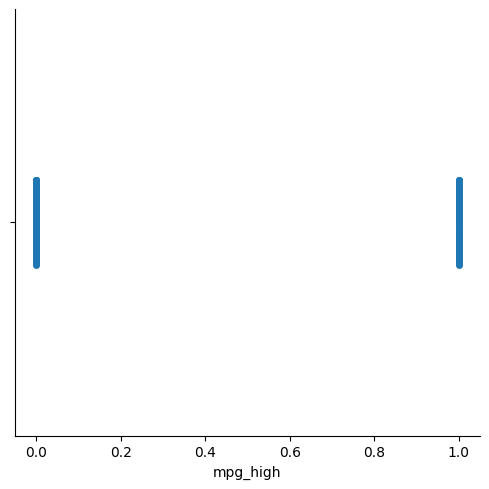

In [ ]:
#Extremely uncertain what is wanted here with a catplot on one variable.
#I learned that the data is split between zero and one in this column.
seaborn.catplot(data=df,x=df["mpg_high"])

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='mpg_high', ylabel='count'>

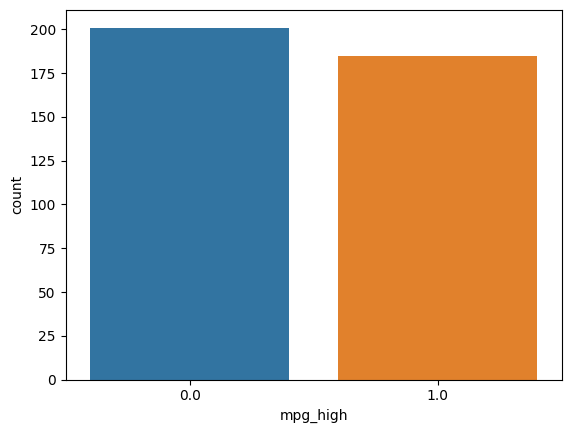

In [ ]:
#Is this what you meant?
#This graph is much more informative. It shows clearly that mpg_high is split
#between zero and one and is fairly balanced.
seaborn.countplot(data=df,x=df["mpg_high"])

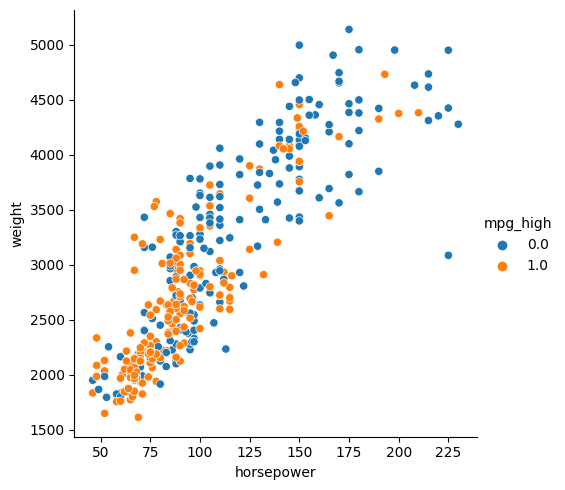

In [ ]:
#This graph shows a linear trend between weight and horsepower, 
#as well as demonstrating that mpg_high tends to come with low horsepower
seaborn.relplot(data=df,x=df["horsepower"],y=df["weight"],hue=df["mpg_high"])

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='mpg_high', ylabel='weight'>

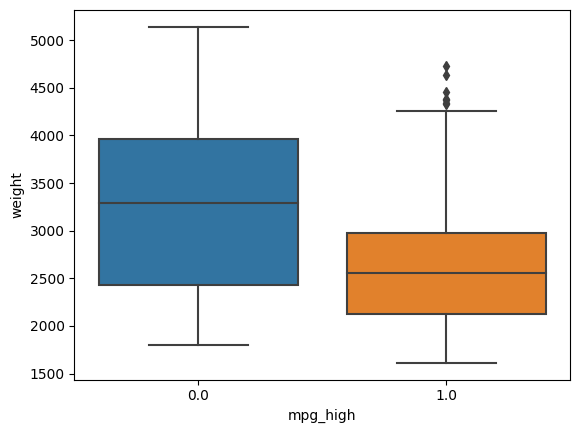

In [ ]:
#This graph clearly shows that the higher mpg cars have a lower weight.
seaborn.boxplot(data=df,x=df["mpg_high"],y=df["weight"])

In [ ]:
dftrain=df.sample(frac=0.8,random_state=1234)
dftests=df.drop(dftrain.index)
ytrain=dftrain["mpg_high"]
ytests=dftests["mpg_high"]
dftrain=dftrain.drop(columns=["mpg_high"],axis=1)
dftests=dftests.drop(columns=["mpg_high"],axis=1)
print(dftrain.shape,dftests.shape)
print(dftrain.head())
print(dftests.head())

(309, 7) (77, 7)
    cylinders  displacement  horsepower  weight  acceleration  year origin
141         4          97.0          78    2300          14.5  74.0      2
365         4         112.0          85    2575          16.2  82.0      1
302         4          91.0          69    2130          14.7  79.0      2
60          4         122.0          86    2226          16.5  72.0      1
76          4         121.0          76    2511          18.0  72.0      2
   cylinders  displacement  horsepower  weight  acceleration  year origin
3          8         304.0         150    3433          12.0  70.0      1
6          8         454.0         220    4354           9.0  70.0      1
12         8         400.0         150    3761           9.5  70.0      1
16         6         199.0          97    2774          15.5  70.0      1
19         4          97.0          46    1835          20.5  70.0      2


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver="lbfgs")
lr.fit(dftrain,ytrain)
pred1=lr.predict(dftests)
print(classification_report(ytests,pred1))
print(r2_score(ytests,pred1))

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72        36
         1.0       0.77      0.66      0.71        41

    accuracy                           0.71        77
   macro avg       0.72      0.72      0.71        77
weighted avg       0.72      0.71      0.71        77

-0.14769647696476995


[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        36
         1.0       0.74      0.76      0.75        41

    accuracy                           0.73        77
   macro avg       0.73      0.73      0.73        77
weighted avg       0.73      0.73      0.73        77

-0.095528455284553


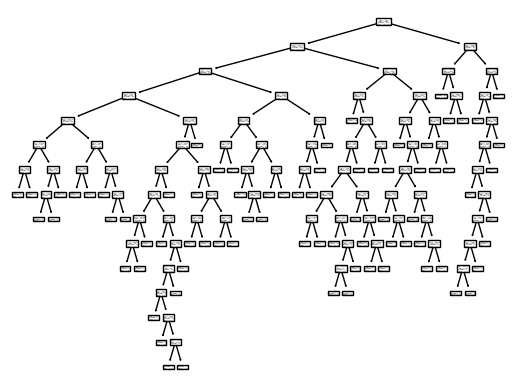

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt = DecisionTreeClassifier()
dt.fit(dftrain,ytrain)
pred2=dt.predict(dftests)
plot_tree(dt)
print(pred2)
print(classification_report(ytests,pred2))
print(r2_score(ytests,pred2))

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,r2_score
nn = MLPRegressor(hidden_layer_sizes=(5,5),max_iter=500,solver='lbfgs',random_state=1234)
nn.fit(dftrain,ytrain)
pred3 = nn.predict(dftests)
print(mean_squared_error(ytests,pred3))
print(r2_score(ytests,pred3))
def myround(val):
  if val < 0:
    return 0
  elif val > 1:
    return 1
  return round(val)
pred4=list(map(myround,pred3))
print(classification_report(ytests,pred4))

0.20379430079672803
0.18137099632533826
              precision    recall  f1-score   support

         0.0       0.67      0.72      0.69        36
         1.0       0.74      0.68      0.71        41

    accuracy                           0.70        77
   macro avg       0.70      0.70      0.70        77
weighted avg       0.70      0.70      0.70        77



In [ ]:
nn2 = MLPRegressor(hidden_layer_sizes=(100,100),max_iter=500,solver='lbfgs',random_state=1234)
nn2.fit(dftrain,ytrain)
pred5 = nn.predict(dftests)
print(mean_squared_error(ytests,pred5))
print(r2_score(ytests,pred5))
pred6=list(map(myround,pred3))
print(classification_report(ytests,pred6))

0.20379430079672803
0.18137099632533826
              precision    recall  f1-score   support

         0.0       0.67      0.72      0.69        36
         1.0       0.74      0.68      0.71        41

    accuracy                           0.70        77
   macro avg       0.70      0.70      0.70        77
weighted avg       0.70      0.70      0.70        77



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytests,pred1))
print(confusion_matrix(ytests,pred2))
print(confusion_matrix(ytests,pred6))

[[28  8]
 [14 27]]
[[25 11]
 [10 31]]
[[26 10]
 [13 28]]


In [ ]:
def myvoting(v):
  if v >= 2:
    return 1
  else:
    return 0
ensemble = list([myvoting(int(pred1[x]+pred2[x]+pred6[x])) for x in range(len(pred1))])
print(classification_report(ytests,ensemble))
print(confusion_matrix(ytests,ensemble))

              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74        36
         1.0       0.78      0.76      0.77        41

    accuracy                           0.75        77
   macro avg       0.75      0.75      0.75        77
weighted avg       0.75      0.75      0.75        77

[[27  9]
 [10 31]]


This document is designed to showcase differences between machine learning algorithms for sklearn. I used three algorithms: logistic regression, decision trees, and neural networks. Their respective accuracies in classification were 71%, 73%, and 70%, so no algorithm far outclassed another for the task at hand. The respective recalls were 78% and 66%, 69% and 76%, and 72% and 68%, for 0 and 1 on the algorithms in order. So logistic regression was better at predicting the class of mpg_high being low, decision trees were better at predicting mpg_high being high, and neural networks were more evenly spread. The precision statistics tell roughly the same story. 

Notice that at the end of this document I've included an ensemble of the three methods that beats out all of the other algorithms individually with an accuracy of 75%. This is the natural conclusion to the analysis of the precision and recall metrics, as some of the algorithms had more trouble with things that others were good at. In reality, this represents one or two cases more than the other algorithms were able to correctly identify, but the difference of a few percentage points in a model like this can represent a huge improvement on a large scale.

Personally, I prefer Python to R, largely because I am much more familiar with Python. R also has a number of features that are nice, but don't mesh well with my other programming knowledge (such as array indexes beginning with one). 